<a href="https://colab.research.google.com/github/navaneeth43/datascience/blob/main/customer2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Project Steps Churn Prediction – Data Science**





In [ ]:
#Import Libraries
from re import X
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,roc_curve
import joblib
import warnings

In [ ]:
# to print data set
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/data/Customer_Churn_Dataset.csv')
print(df)


      customer_age  monthly_charges  total_charges   contract_type  \
0             45.0            61.10        1066.91        One year   
1             48.0              NaN        3121.85        Two year   
2             44.0            72.32        3009.76        Two year   
3             69.0            49.18        4122.45        Two year   
4             45.0            63.40         572.38  Month-to-month   
...            ...              ...            ...             ...   
9995          23.0            85.74        3688.05        One year   
9996          47.0            36.37        2098.19  Month-to-month   
9997          22.0            83.48        2327.87        Two year   
9998          63.0            79.50        1043.26        One year   
9999          59.0            65.35        2052.22        One year   

     internet_service tech_support  tenure_months    payment_method  \
0                 NaN          Yes           36.0      Mailed check   
1                

In [ ]:
# Load the Dataset
df = pd.read_csv("/content/drive/MyDrive/data/Customer_Churn_Dataset.csv")
df.head()

,customer_age,monthly_charges,total_charges,contract_type,internet_service,tech_support,tenure_months,payment_method,streaming_services,customer_support_calls,churn
0,45.0,61.10,1066.91,One year,NaN,Yes,36.0,Mailed check,Yes,2.0,0
1,48.0,NaN,3121.85,Two year,No,NaN,2.0,Mailed check,Yes,NaN,0
2,44.0,72.32,3009.76,Two year,No,NaN,51.0,Electronic check,No,1.0,0
3,69.0,49.18,4122.45,Two year,Fiber optic,No,19.0,Electronic check,NaN,1.0,1
4,45.0,63.40,572.38,Month-to-month,DSL,No,24.0,Mailed check,Yes,3.0,0


In [ ]:
#Data Overview
print("Data Types and Null Values:")
df.info()
print("\nNull values in each column:")
print(df.isnull().sum())

Data Types and Null Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_age            9500 non-null   float64
 1   monthly_charges         9500 non-null   float64
 2   total_charges           9500 non-null   float64
 3   contract_type           9500 non-null   object 
 4   internet_service        9500 non-null   object 
 5   tech_support            9500 non-null   object 
 6   tenure_months           9500 non-null   float64
 7   payment_method          9500 non-null   object 
 8   streaming_services      9500 non-null   object 
 9   customer_support_calls  9500 non-null   float64
 10  churn                   10000 non-null  int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 859.5+ KB

Null values in each column:
customer_age              500
monthly_charges           500
total_charges         

In [ ]:
# Data Cleaning
df.fillna(df.mean(numeric_only=True), inplace=True)
print(df)

      customer_age  monthly_charges  total_charges   contract_type  \
0             45.0        61.100000        1066.91        One year   
1             48.0        70.217283        3121.85        Two year   
2             44.0        72.320000        3009.76        Two year   
3             69.0        49.180000        4122.45        Two year   
4             45.0        63.400000         572.38  Month-to-month   
...            ...              ...            ...             ...   
9995          23.0        85.740000        3688.05        One year   
9996          47.0        36.370000        2098.19  Month-to-month   
9997          22.0        83.480000        2327.87        Two year   
9998          63.0        79.500000        1043.26        One year   
9999          59.0        65.350000        2052.22        One year   

     internet_service tech_support  tenure_months    payment_method  \
0                 NaN          Yes           36.0      Mailed check   
1                

In [ ]:
print(df.to_string())

      customer_age  monthly_charges  total_charges   contract_type internet_service tech_support  tenure_months    payment_method streaming_services  customer_support_calls  churn
0        45.000000        61.100000    1066.910000        One year              NaN          Yes      36.000000      Mailed check                Yes                2.000000      0
1        48.000000        70.217283    3121.850000        Two year               No          NaN       2.000000      Mailed check                Yes                1.992842      0
2        44.000000        72.320000    3009.760000        Two year               No          NaN      51.000000  Electronic check                 No                1.000000      0
3        69.000000        49.180000    4122.450000        Two year      Fiber optic           No      19.000000  Electronic check                NaN                1.000000      1
4        45.000000        63.400000     572.380000  Month-to-month              DSL           No    

In [ ]:
#to inplace
df.replace([np.inf, -np.inf], np.nan, inplace=True)

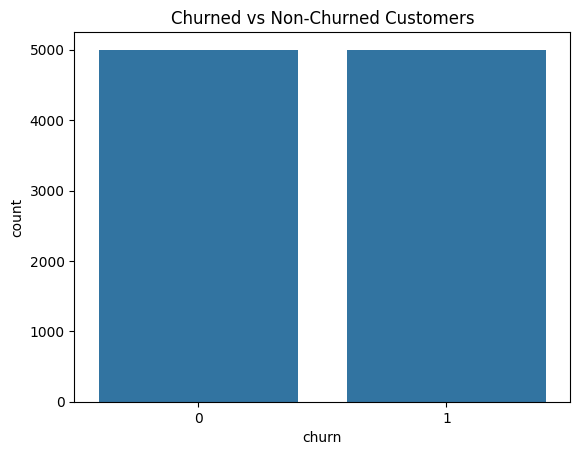

In [ ]:
#Countplot: Churned vs Non-Churned Customers
sns.countplot(x='churn', data=df)
plt.title('Churned vs Non-Churned Customers')
plt.show()

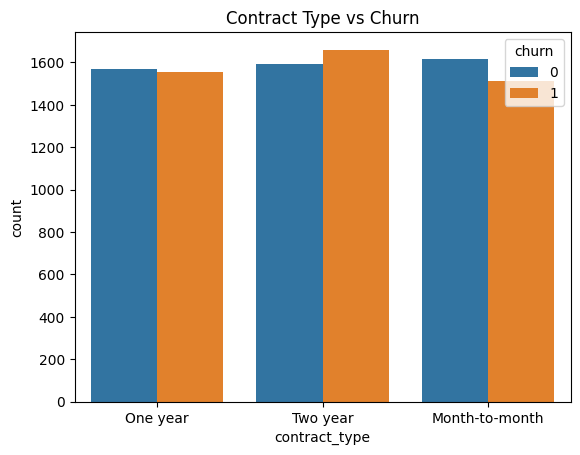

In [ ]:
#Countplot: Contract Type vs Churn
sns.countplot(x='contract_type', hue='churn', data=df)
plt.title('Contract Type vs Churn')
plt.show()

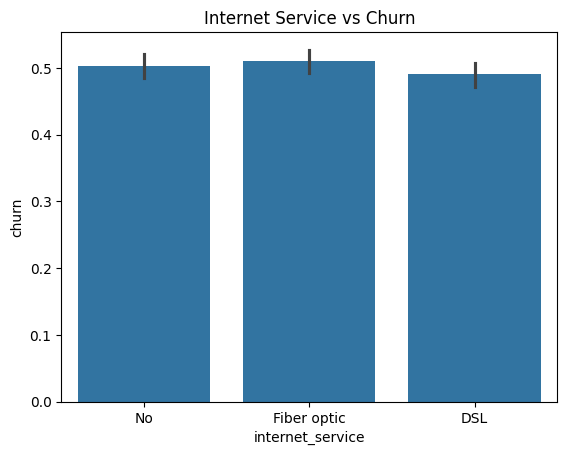

In [ ]:
#Bar Chart:Internet Service vs Churn
sns.barplot(x='internet_service' , y='churn' , data=df)
plt.title('Internet Service vs Churn')
plt.show()

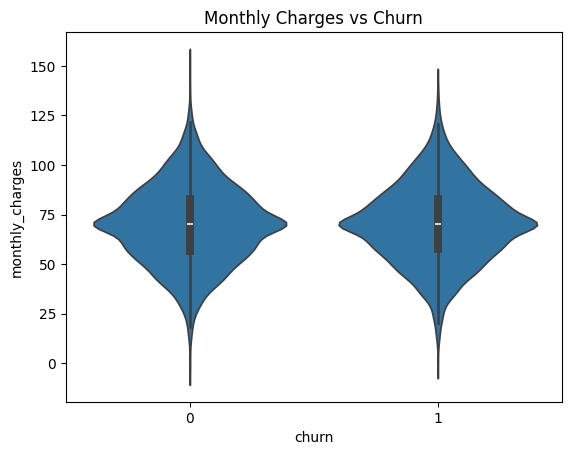

In [ ]:
#Violin Plot: Monthly Charges vs Churn
sns.violinplot(x='churn', y='monthly_charges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

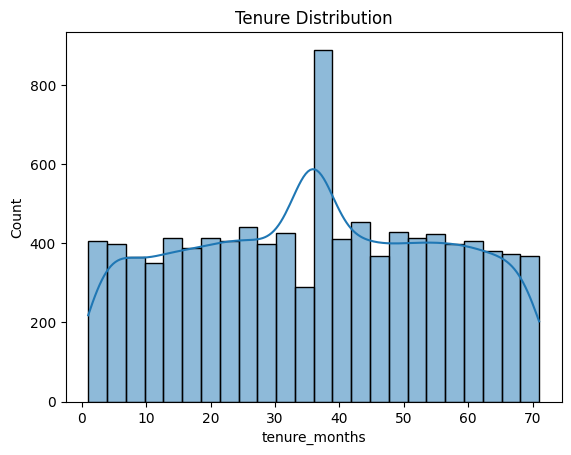

In [ ]:
#Histogram: Tenure Distribution
sns.histplot(x='tenure_months', data=df, kde=True)
plt.title('Tenure Distribution')
plt.show()

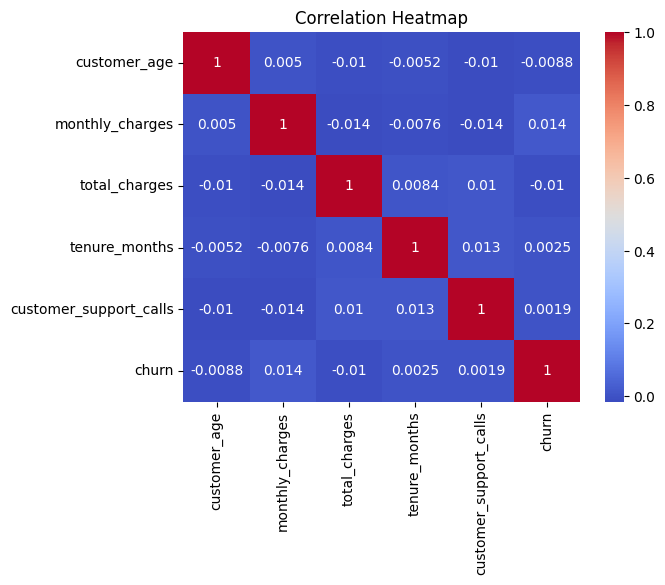

In [ ]:
#Heatmap: Correlation between numerical variables
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

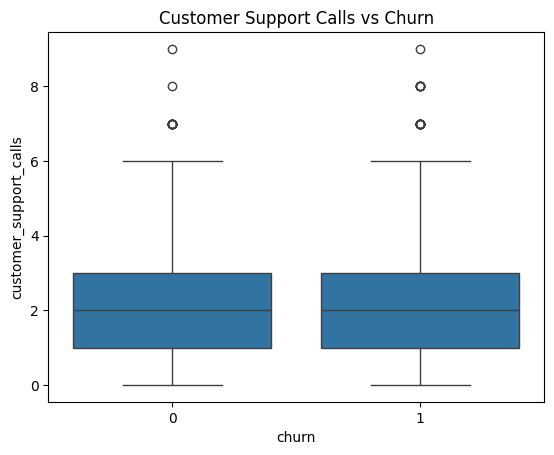

In [ ]:
# Boxplot: Customer Support Calls vs Churn
sns.boxplot(x='churn', y='customer_support_calls', data=df)
plt.title('Customer Support Calls vs Churn')
plt.show()

In [ ]:
# Modeling
warnings.filterwarnings('ignore')

y = df['churn']
X = df.drop('churn', axis=1)

numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include='object').columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=42))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
# Modeling evaluation and Output
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("ROC AUC Score:",roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))

joblib.dump(model,'customer_churn_model.pkl')

Accuracy: 0.5305
Precision: 0.5343915343915344
Recall: 0.5029880478087649
F1 Score: 0.5182144689584403
Confusion Matrix:
 [[556 440]
 [499 505]]
ROC AUC Score: 0.5216803468855501


['customer_churn_model.pkl']